# CSC8628: Image Informatics Coursework - Multi-Food Image Segmentation
### Sandra Mishale Nino Arbelaez

In the following Jupyter Notebook, we will find the proposed algorithm for multi-food image segmentation using classical methods and the calculation of the Intersection Over Union metric for each image. 
Also, we will find the performance of the algorithm in the whole dataset of 2,135 images of different sizes and food types compared to the ground truth images provided by calculating the Mean Intersection Over Union metric. 

In [1]:
# Libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import exposure
from skimage.color import rgb2gray
from skimage.exposure import adjust_gamma
from skimage.filters import sobel

### Sample images

In [2]:
img1 = io.imread('Images/img_dir/00004672.jpg')
imtrue1 = io.imread('Images/ann_dir/00004672.png')

img2 = io.imread('Images/img_dir/00004453.jpg')
imtrue2 = io.imread('Images/ann_dir/00004453.png')

img3 = io.imread('Images/img_dir/00004491.jpg')
imtrue3 = io.imread('Images/ann_dir/00004491.png')

img4 = io.imread('Images/img_dir/00005549.jpg')
imtrue4 = io.imread('Images/ann_dir/00005549.png')

img5 = io.imread('Images/img_dir/00007110.jpg')
imtrue5 = io.imread('Images/ann_dir/00007110.png')

img6 = io.imread('Images/img_dir/00005222.jpg')
imtrue6 = io.imread('Images/ann_dir/00005222.png')

img7 = io.imread('Images/img_dir/00004523.jpg')
imtrue7 = io.imread('Images/ann_dir/00004523.png')

img8 = io.imread('Images/img_dir/00005361.jpg')
imtrue8 = io.imread('Images/ann_dir/00005361.png')

img9 = io.imread('Images/img_dir/00005263.jpg')
imtrue9 = io.imread('Images/ann_dir/00005263.png')

In [14]:
img = io.imread('Images/img_dir/00005262.jpg')
imtrue = io.imread('Images/ann_dir/00005262.png')

### Calculation of the metric: Intersection Over Union

In [3]:
def calculate_iou_score(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    
    return iou_score

### Proposed algorithm

The steps of the proposed algorithm are:
1. Image normalisation
2. Calculation of the intensity average to determine if the image might be too light or too dark
3. If the image is too light with an intensity average over 200, we apply a gamma correction to darken the image
4. If the image is not too light (normal intensity or too dark), we apply a gamma correction to brighten the image
5. Pyramidal Mean Shift of the gamma corrected image
6. Morphological opening of the mean shift image
7. Grayscale conversion
8. Edge detection with Sobel

In [4]:
def segmentation_algorithm(img, display= False):
    # Normalisation
    img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    
    img_gray = cv2.cvtColor(img_norm, cv2.COLOR_BGR2GRAY)
    # Intensity average
    img_int = np.mean(img_gray)
    
    # Gamma correction
    gamma = 0.5
    if img_int > 200: # too light
        gamma = 1.5
        gamma_corrected = adjust_gamma(img_norm, gamma)
    else:
        gamma_corrected = adjust_gamma(img_norm, gamma)

    # Pyramidal meanshift
    img_meanshift = cv2.pyrMeanShiftFiltering(gamma_corrected, sp=15, sr=40, maxLevel=2)
    
    # Morphological opening
    kernel = np.ones((5,5),np.uint8)
    img_opening = cv2.morphologyEx(img_meanshift, cv2.MORPH_OPEN, kernel)
    
    # Grayscale conversion
    img_grayscale = rgb2gray(img_opening)
    
    # Sobel
    img_sobel = sobel(img_grayscale)
    
    if display:
        fig = plt.figure(figsize = (12,6))
        ax = fig.add_subplot(2, 4, 1)
        p = plt.imshow(img_norm, cmap='jet')
        p = plt.title("Normalised Image")
        
        ax = fig.add_subplot(2, 4, 2)
        p = plt.imshow(gamma_corrected, cmap='jet')
        p = plt.title("Gamma correction [" + str(gamma) + "]")
        
        ax = fig.add_subplot(2, 4, 3)
        p = plt.imshow(img_meanshift, cmap='jet')
        p = plt.title("Meanshift Image")
        
        ax = fig.add_subplot(2, 4, 4)
        p = plt.imshow(img_opening, cmap='jet')
        p = plt.title("Morphological Opening")
        
        ax = fig.add_subplot(2, 4, 5)
        p = plt.imshow(img_grayscale, cmap='gray')
        p = plt.title("Grayscale conversion")
        
        ax = fig.add_subplot(2, 4, 6)
        p = plt.imshow(img_sobel, cmap='gray')
        p = plt.title("Sobel")
        
        plt.show()
        
    return img_sobel

### All images - run

In [622]:
images_path = 'Images/img_dir/'
ground_truth_path = 'Images/ann_dir/'

images = os.listdir(images_path)

scores = []
for img_name in images:
    img_path = os.path.join(images_path, img_name)
    gt_path = os.path.join(ground_truth_path, img_name.replace('.jpg', '.png'))
    
    img = io.imread(img_path)
    gtruth = io.imread(gt_path)
    
    segmented_img = segmentation_algorithm(img)
    iou_score = calculate_iou_score(gtruth, segmented_img)
    scores.append(iou_score)

miou = np.average(scores)
print('The Mean Intersection Over Union score is: {:.4f}'.format(miou))

The Mean Intersection Over Union score is: 0.5348


### Sample Images - Good results

The sample images shown below have a IoU score higher than 0.5, which shows good results of the image segmentation

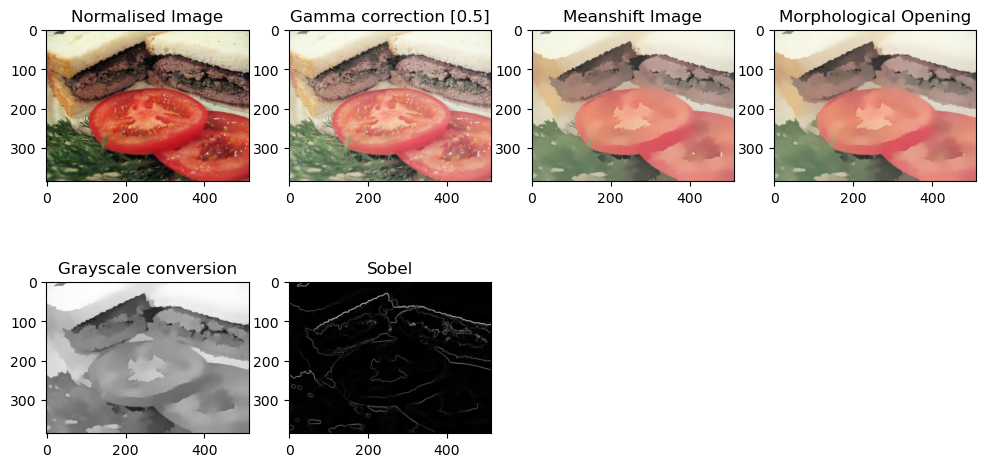

The Intersection Over Union score is: 0.9320


In [5]:
segmented1 = segmentation_algorithm(img1, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue1, segmented1)))

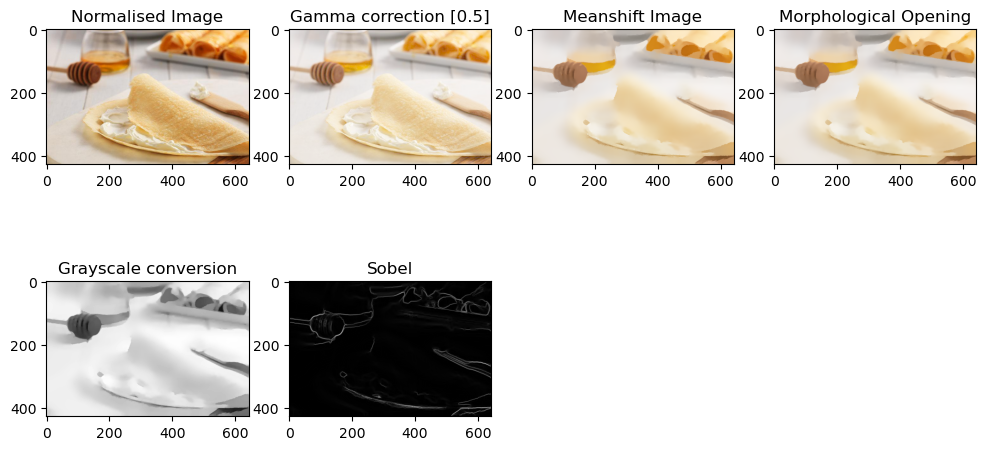

The Intersection Over Union score is: 0.3641


In [15]:
segmented1 = segmentation_algorithm(img, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue, segmented1)))

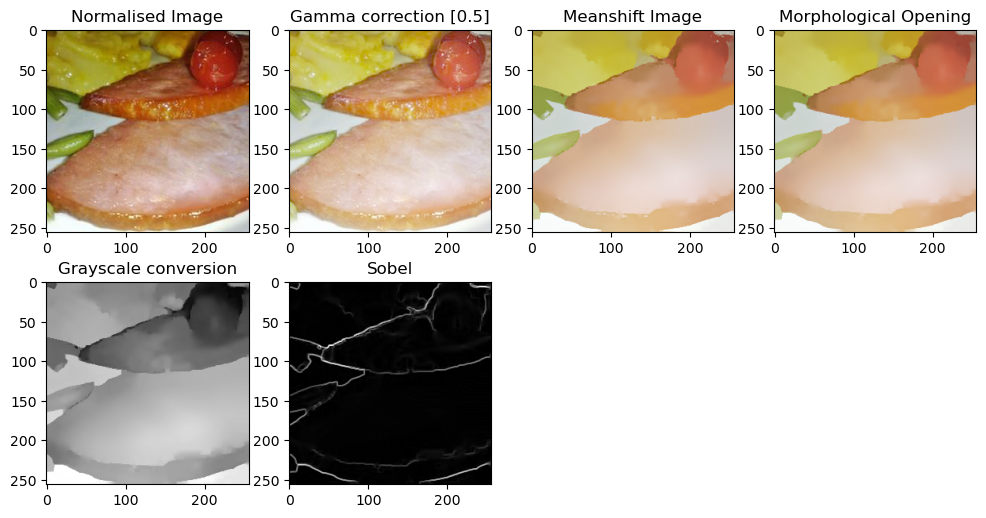

The Intersection Over Union score is: 0.9048


In [6]:
segmented2 = segmentation_algorithm(img2, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue2, segmented2)))

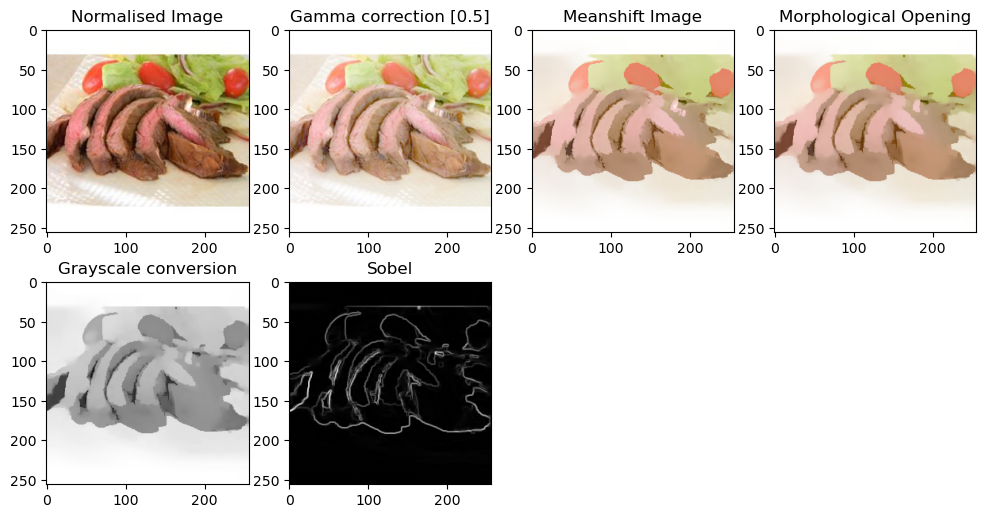

The Intersection Over Union score is: 0.5722


In [7]:
segmented3 = segmentation_algorithm(img3, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue3, segmented3)))

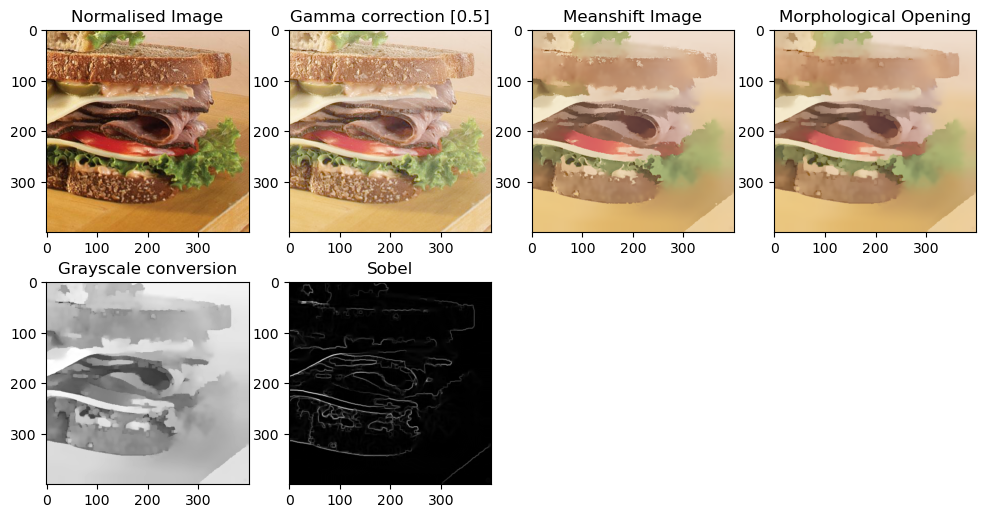

The Intersection Over Union score is: 0.6975


In [8]:
segmented4 = segmentation_algorithm(img4, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue4, segmented4)))

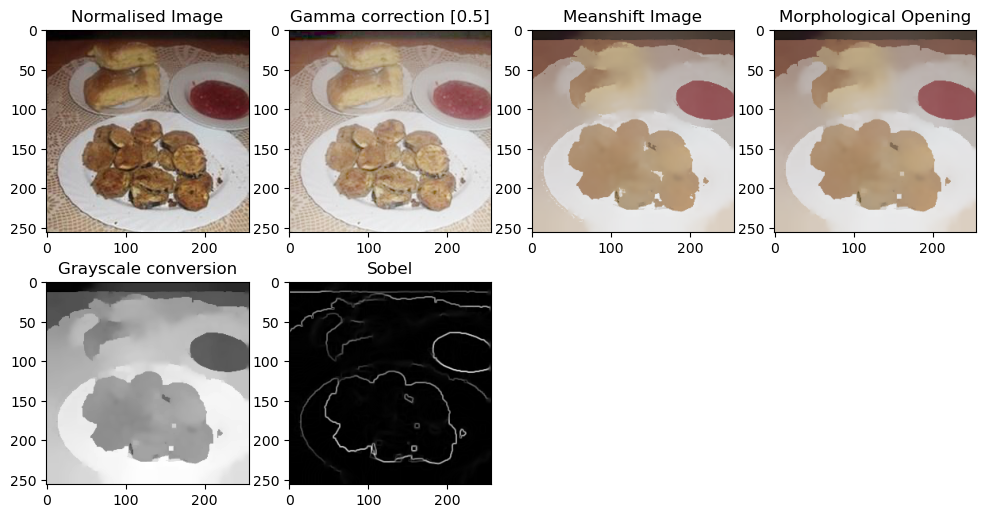

The Intersection Over Union score is: 0.3776


In [9]:
segmented5 = segmentation_algorithm(img5, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue5, segmented5)))

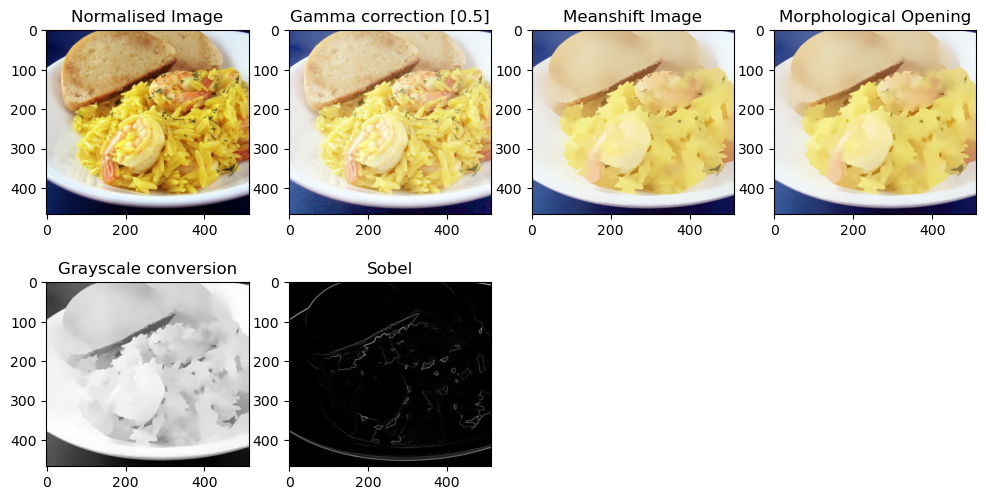

The Intersection Over Union score is: 0.6842


In [10]:
segmented6 = segmentation_algorithm(img6, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue6, segmented6)))

## Sample images - room for improvement

The sample images shown below have a IoU score less than 0.5 highlighting the situations where the proposed algorithm struggles.

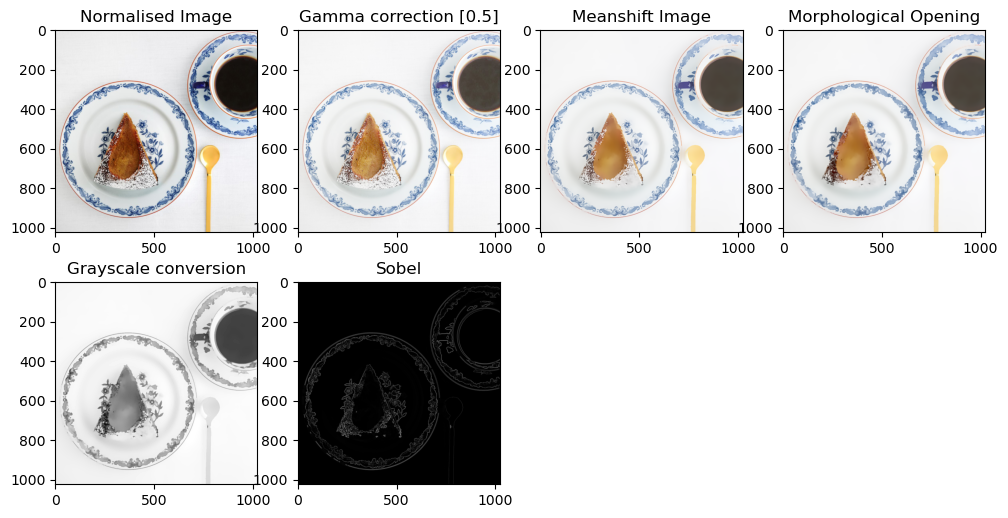

The Intersection Over Union score is: 0.1388


In [11]:
segmented7 = segmentation_algorithm(img7, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue7, segmented7)))

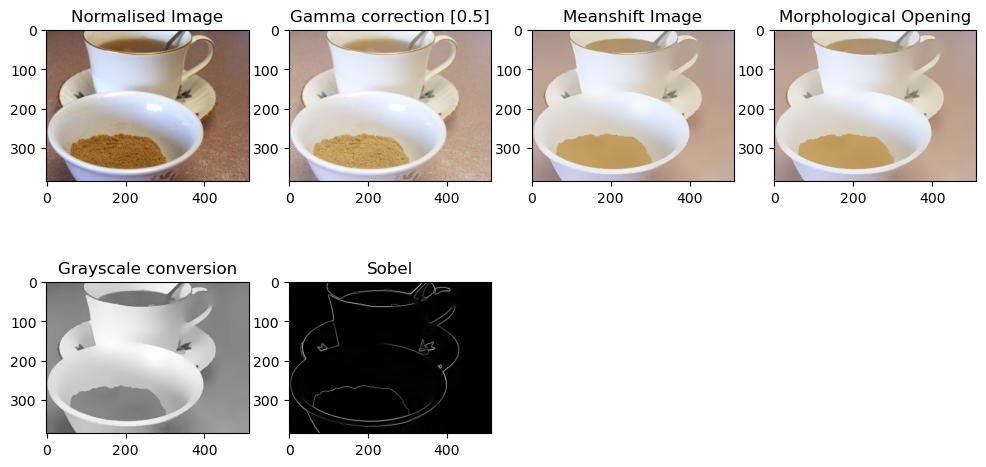

The Intersection Over Union score is: 0.1061


In [12]:
segmented8 = segmentation_algorithm(img8, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue8, segmented8)))

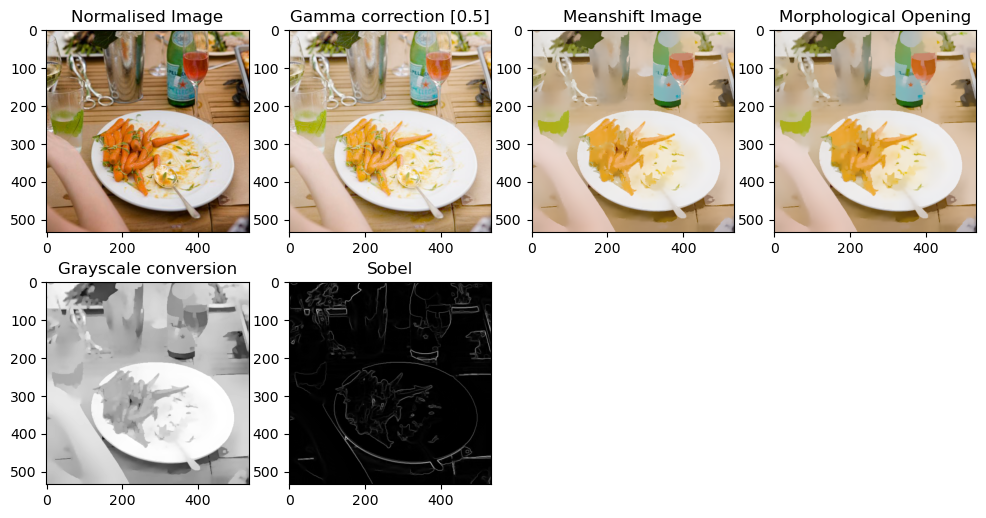

The Intersection Over Union score is: 0.1217


In [13]:
segmented9 = segmentation_algorithm(img9, True)
print('The Intersection Over Union score is: {:.4f}'.format(calculate_iou_score(imtrue9, segmented9)))